<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [195]:
import tensorflow
tensorflow.__version__

'1.14.0'

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

np.random.seed(812)

In [214]:
from tensorflow.keras.datasets import boston_housing

(X_train , y_train), (X_test, y_test) = boston_housing.load_data()

In [215]:
X_train.shape

(404, 13)

In [216]:
X_train[0].shape

(13,)

In [217]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [218]:
y_train.shape

(404,)

In [219]:
y_train[0]

15.2

In [220]:
y_train.max()

50.0

In [221]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [222]:
y_train[2]

50.0

In [223]:
boston_model = Sequential()

# Input => Hidden
boston_model.add(Dense(64, input_dim=13, activation='relu'))
# Hidden
boston_model.add(Dense(64, activation='relu'))
# Output Layer
boston_model.add(Dense(1, activation='linear'))

# Compile
boston_model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mean_squared_error'])

boston_model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_103 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [225]:
history = boston_model.fit(X_train, y_train, epochs=150, validation_split=.1, verbose=0)
scores = boston_model.evaluate(X_test, y_test)
print(f'{boston_model.metrics_names[1]}: {scores[1]*100}')

102/102 [==============================] - 0s 30us/sample - loss: 39.3438 - mean_squared_error: 39.3438
mean_squared_error: 3934.3841552734375


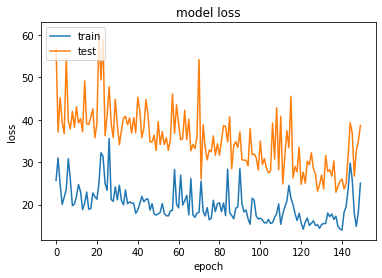

In [226]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [181]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [182]:
# Load the Data
(X_train , y_train), (X_test, y_test) = fashion_mnist.load_data()

In [183]:
X_train.shape

(60000, 28, 28)

In [184]:
X_test.shape

(10000, 28, 28)

In [185]:
X_train[0].shape

(28, 28)

In [186]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20


In [187]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [188]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [189]:
# Correct Encoding on Y
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [190]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [191]:
fashion_mnist_model = Sequential()

# Input => Hidden
fashion_mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
fashion_mnist_model.add(Dense(16, activation='relu'))
# Hidden
fashion_mnist_model.add(Dense(16, activation='relu'))
# Hidden
fashion_mnist_model.add(Dense(16, activation='relu'))
# Output Layer
fashion_mnist_model.add(Dense(10, activation='softmax'))

# Compile
fashion_mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

fashion_mnist_model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_89 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_90 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_91 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_92 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [192]:
history = fashion_mnist_model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=.1, verbose=0)
scores = fashion_mnist_model.evaluate(X_test, y_test)
print(f'{fashion_mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 17us/sample - loss: 0.5373 - acc: 0.8034
acc: 80.33999800682068


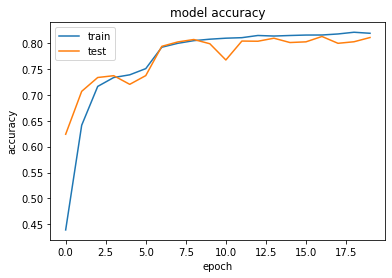

In [193]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

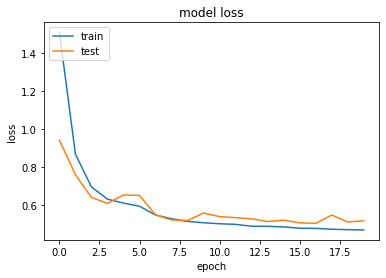

In [194]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.